In [1]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
moviedata = pd.read_csv('Final-CLEAN-Dataset.csv')
moviedata

,ID,Title,Decade,Age,IMDb,Rotten,Availability Score,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010s,13+,8.8,87,1,Christopher Nolan,Action,United States,English,148
1,2,The Matrix,1990s,18+,8.7,87,1,Lana Wachowski,Action,United States,English,136
2,3,Avengers: Infinity War,2010s,13+,8.5,84,1,Anthony Russo,Action,United States,English,149
3,4,Back to the Future,1980s,7+,8.5,96,1,Robert Zemeckis,Adventure,United States,English,116
4,5,"The Good, the Bad and the Ugly",1960s,18+,8.8,97,2,Sergio Leone,Western,Italy,Italian,161
...,...,...,...,...,...,...,...,...,...,...,...,...
5551,5552,The Story of the Animated Drawing,1950s,all,7.6,41,1,William Beaudine,Adventure,United States,English,60
5552,5553,Buried Truth of the Maya,2020s,7+,5.4,40,1,Bengt Anderson,Documentary,United States,English,47
5553,5554,The Liberty Story,1950s,all,7.4,40,1,Hamilton Luske,Adventure,United States,English,60
5554,5555,Big Sur-Wild California,2010s,all,6.7,40,1,Sue Houghton,Documentary,United States,English,50


In [3]:
moviedata.describe()

,ID,IMDb,Rotten,Availability Score,Runtime
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,2778.500000,6.230148,60.207163,1.055796,100.980202
std,1604.023379,1.078126,22.265142,0.234205,22.003043
min,1.000000,1.100000,2.000000,1.000000,2.000000
25%,1389.750000,5.600000,45.000000,1.000000,90.000000
50%,2778.500000,6.300000,61.000000,1.000000,99.000000
75%,4167.250000,7.000000,77.000000,1.000000,110.250000
max,5556.000000,9.000000,100.000000,3.000000,359.000000


In [4]:
# Quantile 25% and 75%
Q1 = moviedata['Runtime'].quantile(0.25)
Q3 = moviedata['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

# Remove the outliers
moviedata = moviedata.drop(moviedata[(moviedata['Runtime'] <= Q1 - 1.5*IQR) | (moviedata['Runtime'] >= Q3 + 1.5*IQR)].index)
moviedata

#moviedata.rename(columns = {"index": "ID"})

,ID,Title,Decade,Age,IMDb,Rotten,Availability Score,Directors,Genres,Country,Language,Runtime
1,2,The Matrix,1990s,18+,8.7,87,1,Lana Wachowski,Action,United States,English,136
3,4,Back to the Future,1980s,7+,8.5,96,1,Robert Zemeckis,Adventure,United States,English,116
5,6,Spider-Man: Into the Spider-Verse,2010s,7+,8.4,97,1,Bob Persichetti,Animation,United States,English,117
8,9,Raiders of the Lost Ark,1980s,7+,8.4,95,1,Steven Spielberg,Action,United States,English,115
10,11,Taxi Driver,1970s,18+,8.3,95,1,Martin Scorsese,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
5543,5544,Own the Room,2020s,7+,6.4,46,1,Cristina Costantini,Documentary,United States,English,91
5544,5545,Unidentified Flying Oddball,1970s,all,5.2,45,1,Russ Mayberry,Adventure,United States,English,93
5546,5547,'Twas the Night,2000s,all,5.3,45,1,Nick Castle,Comedy,United States,English,84
5551,5552,The Story of the Animated Drawing,1950s,all,7.6,41,1,William Beaudine,Adventure,United States,English,60


In [5]:
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)
moviedata

,ID,Title,Decade,Age,IMDb,Rotten,Availability Score,Directors,Genres,Country,Language,Runtime
0,1,The Matrix,1990s,18+,8.7,87,1,Lana Wachowski,Action,United States,English,136
1,2,Back to the Future,1980s,7+,8.5,96,1,Robert Zemeckis,Adventure,United States,English,116
2,3,Spider-Man: Into the Spider-Verse,2010s,7+,8.4,97,1,Bob Persichetti,Animation,United States,English,117
3,4,Raiders of the Lost Ark,1980s,7+,8.4,95,1,Steven Spielberg,Action,United States,English,115
4,5,Taxi Driver,1970s,18+,8.3,95,1,Martin Scorsese,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,Own the Room,2020s,7+,6.4,46,1,Cristina Costantini,Documentary,United States,English,91
5212,5213,Unidentified Flying Oddball,1970s,all,5.2,45,1,Russ Mayberry,Adventure,United States,English,93
5213,5214,'Twas the Night,2000s,all,5.3,45,1,Nick Castle,Comedy,United States,English,84
5214,5215,The Story of the Animated Drawing,1950s,all,7.6,41,1,William Beaudine,Adventure,United States,English,60


In [6]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5216 non-null   int64  
 1   Title               5216 non-null   object 
 2   Decade              5216 non-null   object 
 3   Age                 5216 non-null   object 
 4   IMDb                5216 non-null   float64
 5   Rotten              5216 non-null   int64  
 6   Availability Score  5216 non-null   int64  
 7   Directors           5216 non-null   object 
 8   Genres              5216 non-null   object 
 9   Country             5216 non-null   object 
 10  Language            5216 non-null   object 
 11  Runtime             5216 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 489.1+ KB


## Numeric Variables

In [7]:
EDA_numeric = ["IMDb", "Rotten", "Runtime"]

In [8]:
moviedata[EDA_numeric].describe()

,IMDb,Rotten,Runtime
count,5216.000000,5216.000000,5216.000000
mean,6.179870,59.836273,100.319018
std,1.064067,22.375588,14.473748
min,1.100000,2.000000,60.000000
25%,5.600000,45.000000,90.000000
50%,6.300000,60.000000,98.000000
75%,6.900000,76.000000,109.000000
max,9.000000,100.000000,140.000000


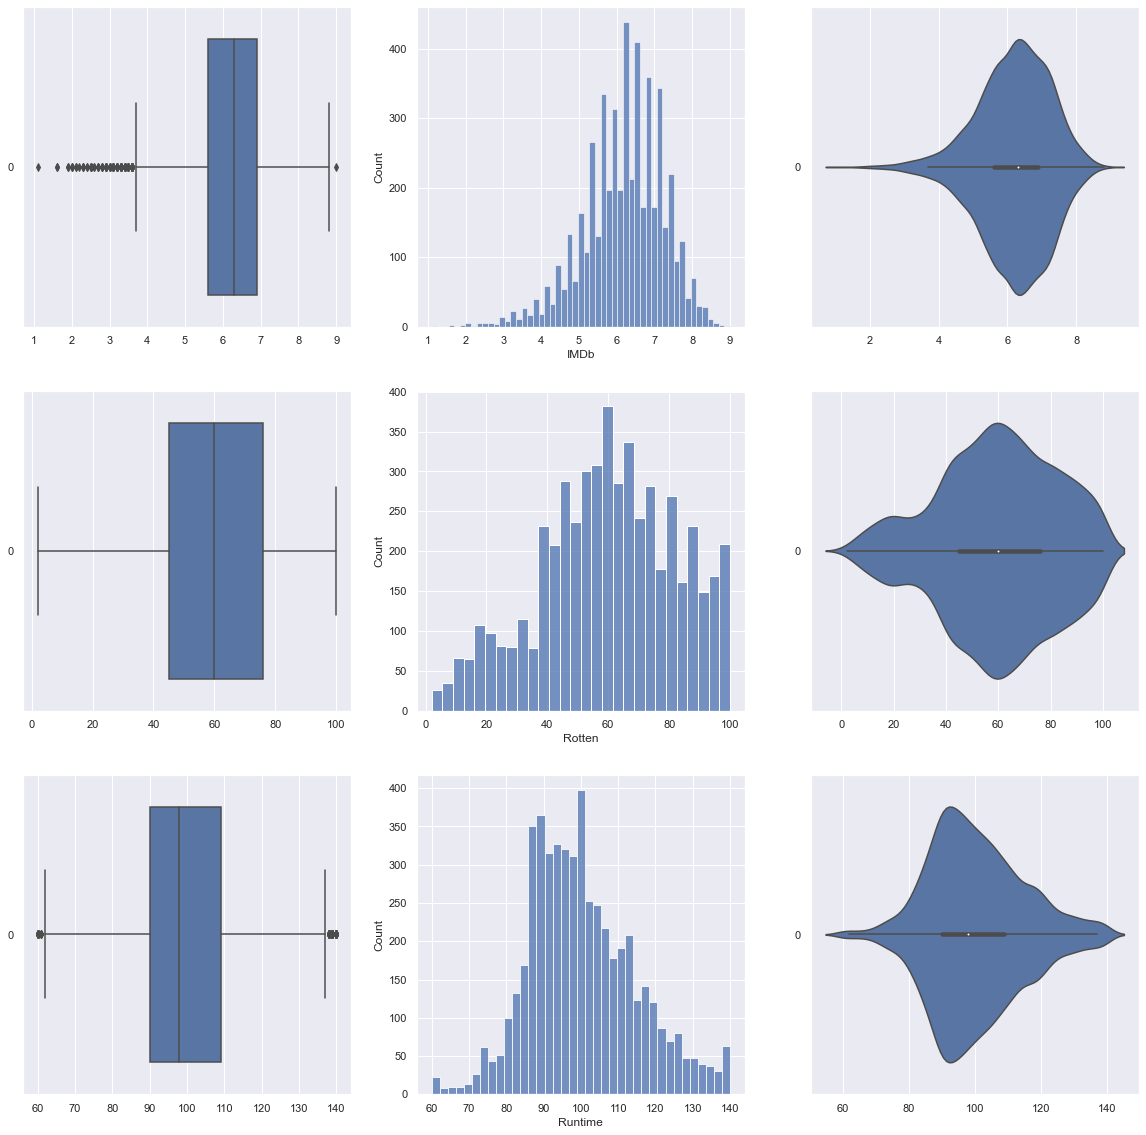

In [9]:
# Draw boxplot, histplot and violinplot of IMDb, Rotten and Runtime
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for i in EDA_numeric:
    sb.boxplot(data = moviedata[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = moviedata[i], ax = axes[count,1])
    sb.violinplot(data = moviedata[i], orient = "h", ax = axes[count,2])
    count += 1

## Categorical Variables

In [10]:
EDA_categorical = ["Decade", "Age", "Availability Score", "Directors", "Genres", "Country", "Language"]

Decade_order = ['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s', '1950s', '1940s', '1930s', '1920s', '1910s', '1900s']
Age_order = ["18+", "16+", "13+", "7+", "all"]
Availability_Score_order = ["3", "2", "1"]
Directors_order
Genres_order = ["Comedy", "Drama",Action
Documentary   
Animation      
Crime 
Horror  
Biography     
Adventure  
Thriller         
Family           
Fantasy          
Mystery          
Romance          
Western          
Sci-Fi           
Music             
Sport             
Musical           
War               
Talk-Show         
Country_order
Language]

In [31]:
moviedata["Age"].value_counts()

18+    2617
13+    1095
7+      940
all     359
16+     205
Name: Age, dtype: int64

In [32]:
moviedata["Age"].value_counts()

18+    2617
13+    1095
7+      940
all     359
16+     205
Name: Age, dtype: int64

In [33]:
moviedata["Availability Score"].value_counts()

1    4924
2     286
3       6
Name: Availability Score, dtype: int64

In [34]:
moviedata["Genres"].value_counts()

Comedy         1307
Drama          1012
Action          882
Documentary     427
Animation       339
Crime           298
Horror          273
Biography       268
Adventure       259
Thriller         48
Family           23
Fantasy          20
Mystery          16
Romance          13
Western          11
Sci-Fi           10
Music             4
Sport             2
Musical           2
War               1
Talk-Show         1
Name: Genres, dtype: int64

In [11]:
#for i in EDA_categorical:
    #sb.catplot(y = i, data = EDA_categorical[i], kind = "count", height = 8)

TypeError: list indices must be integers or slices, not str

In [17]:
#a = moviedata[EDA_categorical]
sb.catplot(y = "Directors", data = moviedata[EDA_categorical], kind = "count", height = 8)

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Error in callback <function flush_figures at 0x0000022DB49FDA60> (for post_execute):


KeyboardInterrupt: 

## Correlation

In [35]:
IMDb = pd.DataFrame(moviedata["IMDb"])
Rotten = pd.DataFrame(moviedata["Rotten"])
Runtime = pd.DataFrame(moviedata["Runtime"])
Availability_Score = pd.DataFrame(moviedata["Availability Score"])

<AxesSubplot:>

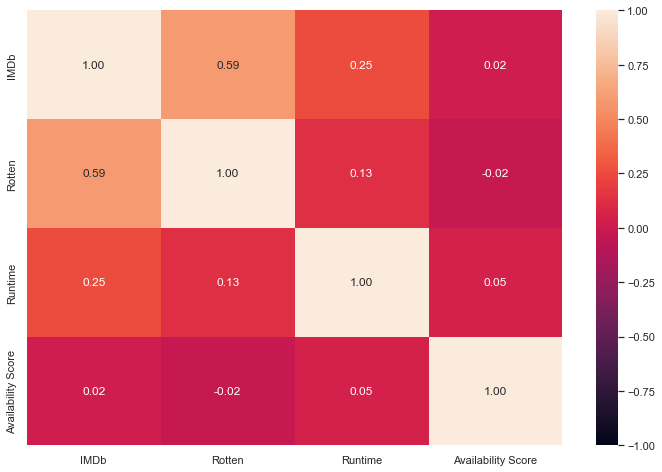

In [36]:
numeric_corr = pd.concat([IMDb, Rotten, Runtime, Availability_Score], axis = 1)

f = plt.figure(figsize=(12, 8))
sb.heatmap(numeric_corr.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")